In [17]:
import os,nbloader,warnings,sys,time
warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"]="0"

from main_multigoal_config import *
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
print("{}".format(kl_targ_list))
print("{}".format(entcoeff_list))
print("{}".format(mdn_weigth_list))
print("{}".format(n_mixture_list))
print("{}".format(epi_size_list))
print("{}".format(seed_list))

[0.003]
[0.001, 0.1, 1e-05]
['sparsemax', 'softmax']
[4]
[300]
[0, 1, 2, 3, 4]


In [30]:
perf_list = np.zeros([len(mdn_weigth_list),len(entcoeff_list),len(seed_list),301])
reach_list = np.zeros([len(mdn_weigth_list),len(entcoeff_list),len(seed_list),301,4])

# seed:0,kl:3.00e-03,entcoeff:1.00e-03,weight:sparsemax,mixture:4,epi_size:500.pickle
n_mixture = n_mixture_list[0]
kl_targ = kl_targ_list[0]
episode_size = 500#epi_size_list[0]
for mdn_weigth_idx in range(len(mdn_weigth_list)):
    for entcoeff_idx in range(len(entcoeff_list)):
        for seed_idx in range(len(seed_list)):
            seed = seed_list[seed_idx]
            entcoeff = entcoeff_list[entcoeff_idx]
            mdn_weight = mdn_weigth_list[mdn_weigth_idx]
            saver_prefix="./results/seed:{},kl:{:.2e},entcoeff:{:.2e},weight:{},mixture:{:d},epi_size:{}.pickle".format(seed,kl_targ,entcoeff,mdn_weight,n_mixture,episode_size)
#             print(saver_prefix)
#             print(os.path.isfile(saver_prefix))
            if os.path.exists(saver_prefix):
                f = open( saver_prefix, "rb" )
                data = pickle.load(f)
                perf_list[mdn_weigth_idx][entcoeff_idx][seed_idx] = data['mean_ret_list']
                for update in range(301):
                    for t in data['info_list'][update]:
                        if any(goal==0 for goal in t):
                            reach_list[mdn_weigth_idx][entcoeff_idx][seed_idx][update][0] = 1
                        if any(goal==1 for goal in t):
                            reach_list[mdn_weigth_idx][entcoeff_idx][seed_idx][update][1] = 1
                        if any(goal==2 for goal in t):
                            reach_list[mdn_weigth_idx][entcoeff_idx][seed_idx][update][2] = 1
                        if any(goal==3 for goal in t):
                            reach_list[mdn_weigth_idx][entcoeff_idx][seed_idx][update][3] = 1

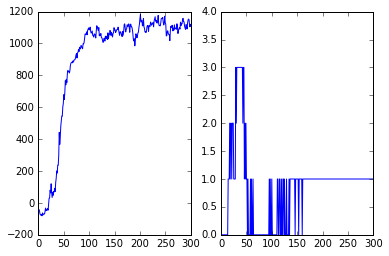

In [32]:
for mdn_weigth_idx in range(len(mdn_weigth_list)):
    for entcoeff_idx in range(len(entcoeff_list)):
        for seed_idx in range(len(seed_list)):
            seed = seed_list[seed_idx]
            entcoeff = entcoeff_list[entcoeff_idx]
            mdn_weight = mdn_weigth_list[mdn_weigth_idx]
            saver_prefix="./results/seed:{},kl:{:.2e},entcoeff:{:.2e},weight:{},mixture:{:d},epi_size:{}.pickle".format(seed,kl_targ,entcoeff,mdn_weight,n_mixture,episode_size)
#             print(saver_prefix)
#             print(os.path.isfile(saver_prefix))
            if os.path.exists(saver_prefix):
                plt.subplot(121)
                plt.plot(perf_list[mdn_weigth_idx][entcoeff_idx][seed_idx])
                plt.subplot(122)
                plt.plot(np.sum(reach_list[mdn_weigth_idx][entcoeff_idx][seed_idx],axis=1))
                plt.ylim([0,4])
plt.show()